### EDA

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from src.database.db_conection import connect_db

In [2]:
engine = connect_db()

In [3]:
df = pd.read_sql_query('SELECT * FROM "rawCandidates"', engine)
print(df.head())

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                         10  
2          

In [4]:
df.describe()

,YOE,Code Challenge Score,Technical Interview Score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


In [5]:
print(df.isnull().sum())

First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64


In [6]:
df.count()


First Name                   50000
Last Name                    50000
Email                        50000
Application Date             50000
Country                      50000
YOE                          50000
Seniority                    50000
Technology                   50000
Code Challenge Score         50000
Technical Interview Score    50000
dtype: int64

In [7]:
df.shape

(50000, 10)

In [8]:

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [9]:
print(df.dtypes)

First Name                   object
Last Name                    object
Email                        object
Application Date             object
Country                      object
YOE                           int64
Seniority                    object
Technology                   object
Code Challenge Score          int64
Technical Interview Score     int64
dtype: object


In [10]:
print(df.describe(include="object"))

       First Name Last Name                 Email Application Date Country  \
count       50000     50000                 50000            50000   50000   
unique       3007       474                 49833             1646     244   
top         Sarai   Murazik  marianne31@yahoo.com       2020-07-07  Malawi   
freq           33       138                     3               50     242   

       Seniority        Technology  
count      50000             50000  
unique         7                24  
top       Intern  Game Development  
freq        7255              3818  


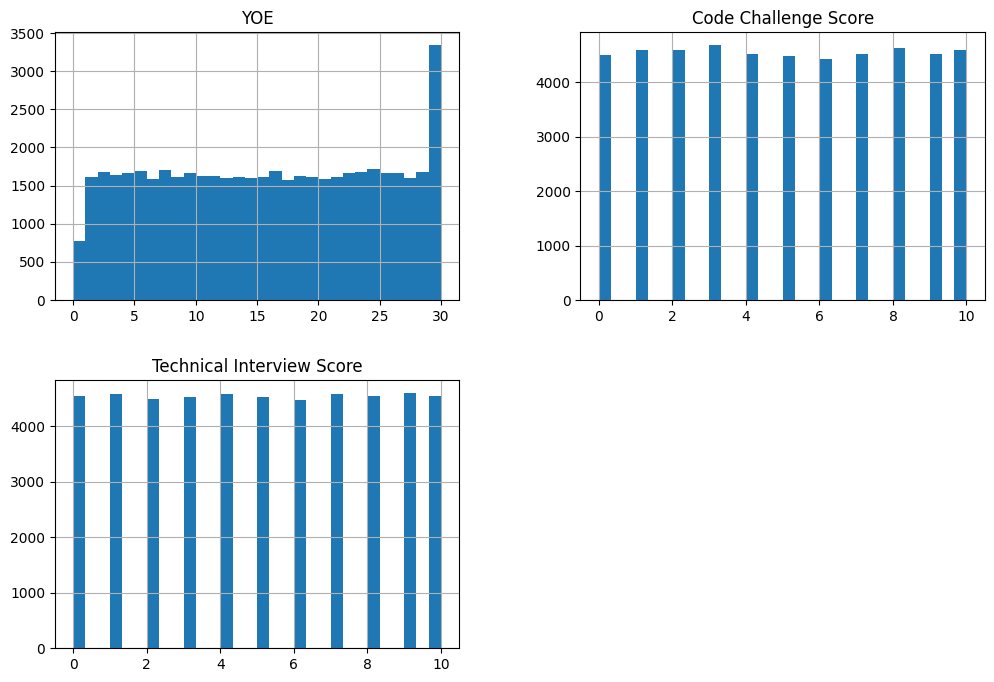

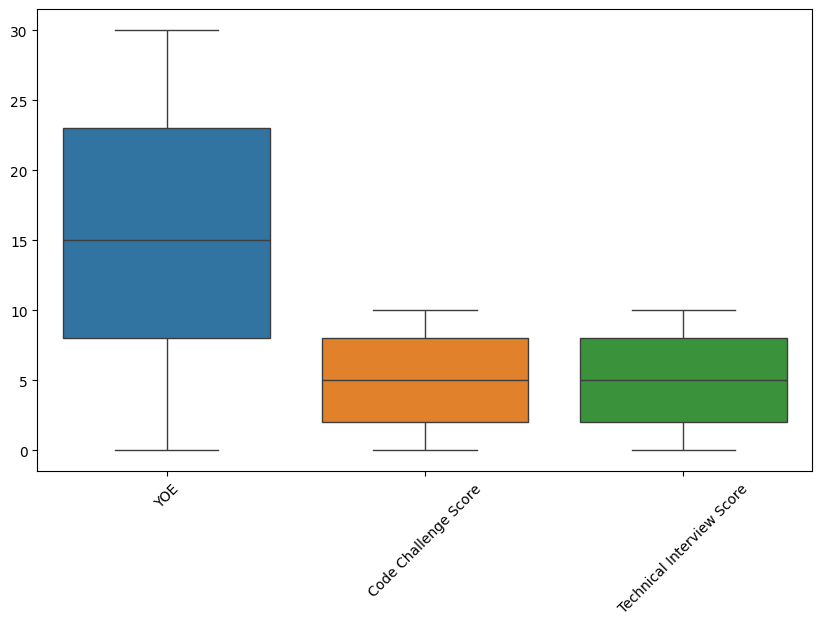

In [11]:
# Histogramas
df.hist(figsize=(12,8), bins=30)
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include=["number"]))
plt.xticks(rotation=45)
plt.show()

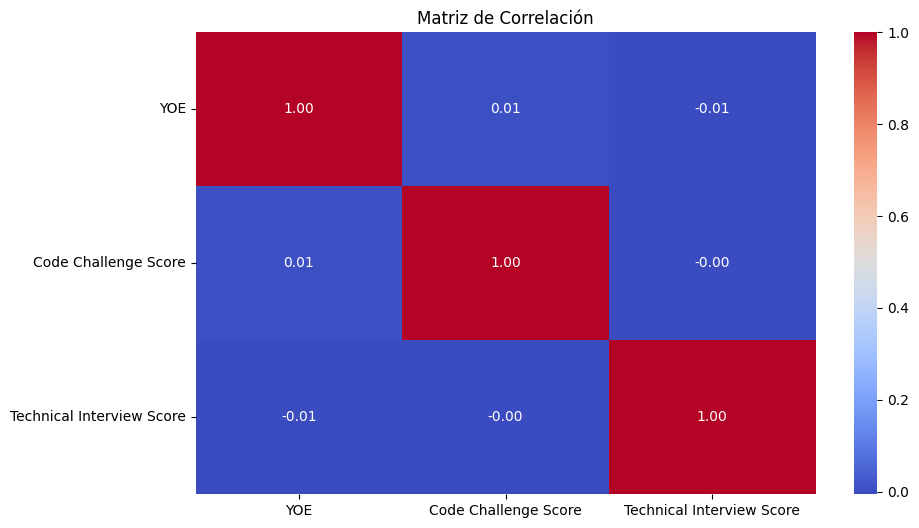

In [12]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

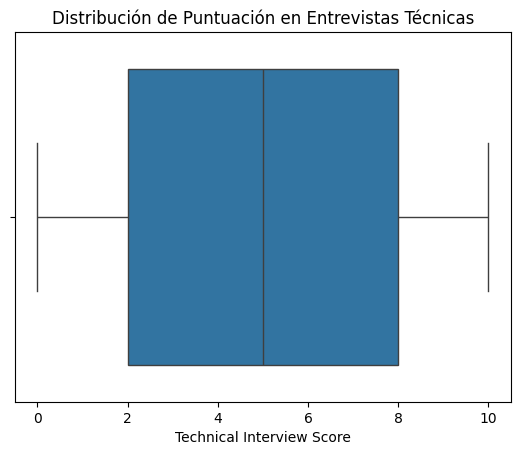

In [13]:
sns.boxplot(x=df["Technical Interview Score"])
plt.title("Distribución de Puntuación en Entrevistas Técnicas")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13856\2907376011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


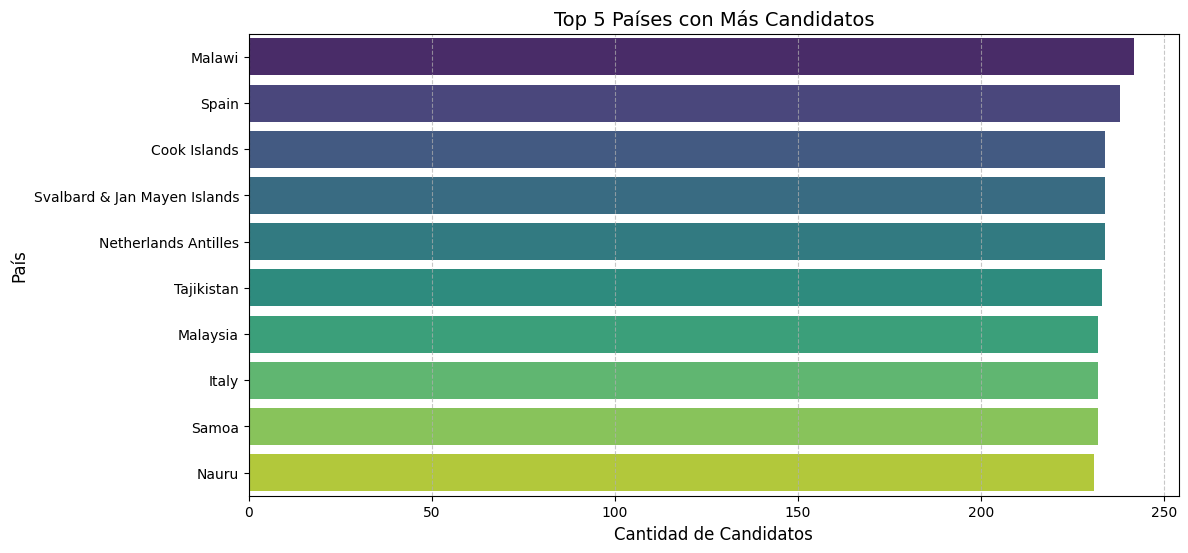

In [14]:
top_countries = df["Country"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")

plt.title("Top 5 Países con Más Candidatos", fontsize=14)
plt.xlabel("Cantidad de Candidatos", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


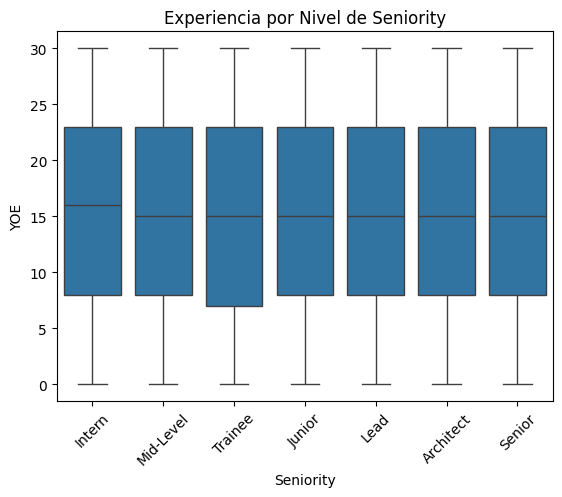

In [15]:
sns.boxplot(x=df["Seniority"], y=df["YOE"])
plt.title("Experiencia por Nivel de Seniority")
plt.xticks(rotation=45)
plt.show()



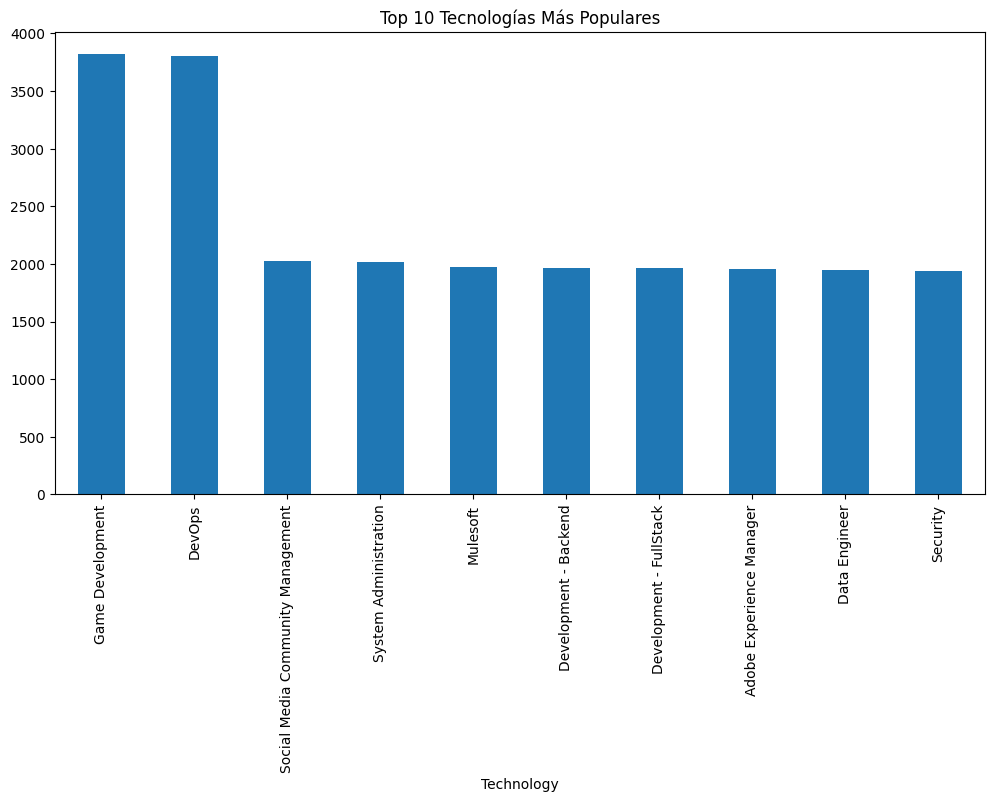

In [16]:
df["Technology"].value_counts().head(10).plot(kind="bar", figsize=(12,6))
plt.title("Top 10 Tecnologías Más Populares")
plt.show()
